# softmax回归

视频：https://www.bilibili.com/video/BV1K64y1Q7wu?spm_id_from=333.999.0.0

3.4 3.5 3.7章节：https://zh-v2.d2l.ai/chapter_multilayer-perceptrons/index.html

·softmax运算获取一个向量并将其映射为概率。

·softmax回归适用于分类问题。它使用了softmax运算中输出类别的概率分布。

·交叉熵是一个衡量两个概率分布之间差异的很好的度量。它测量给定模型编码数据所需的比特数。

# 一 笔记

## 1.回归与分类

>分类与回归区别
>>回归
>>>回归估计一个连续值：预测房价  
>>>单个连续数值输出  
>>>自然区间R  
>>>跟真实值的区别作为损失  
>>>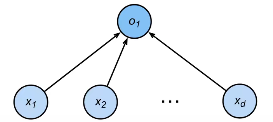

>>分类
>>>分类预测一个离散类别：识别图片猫狗  
>>>通常多个输出（输出个数为类别个数）  
>>>输出i是预测为第i类的置信度  
>>>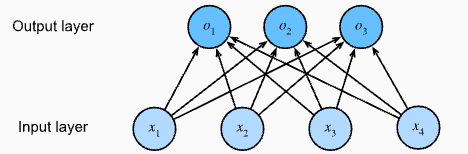



## 2.从回归过渡到分类问题

· 对类别进行一位有效编码（one-hot）
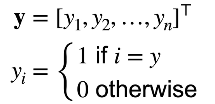

· 使用均方损失训练

· 最大值为预测值
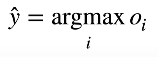

· 输出匹配概率（非负，和为1）
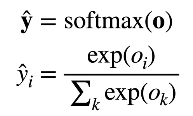

---

---

---

# 二 代码实战

## 数据集



In [1]:
# 导入包

%matplotlib inline

import torch
import torchvision
from torch.utils import data
from torchvision import transforms
from d2l import torch as d2l

d2l.use_svg_display()

### 1.读取数据集

通过框架中的内置函数将Fashion-MNIST数据集下载并读取到内存中。

（1）把图片转换成pytorch的tensor格式
`trans = transforms.ToTensor()`


（2）从torchvision下载数据集  
训练数据：  
`数据集 = torchvision.datasets.FashionMNIST(root="存储文件夹路径", train=True, transform=trans, download=True)`   
测试数据：  
`数据集 = torchvision.datasets.FashionMNIST(root="存储文件夹路径", train=False, transform=trans, download=True)`


（3）查看数据  
查看数据量：`len(数据集)`


In [2]:
# 把图片转换成pytorch格式tensor
trans = transforms.ToTensor()

# 从torchvision下载数据集
mnist_train = torchvision.datasets.FashionMNIST(root="./dataset", train=True, transform=trans, download=True)
mnist_test = torchvision.datasets.FashionMNIST(root="./dataset", train=False, transform=trans, download=True)


C:\ProgramData\Anaconda3\lib\site-packages\torchvision\datasets\mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ..\torch\csrc\utils\tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [3]:
# 查看数据数量
len(mnist_train), len(mnist_test)

(60000, 10000)

In [4]:
# 查看第一张训练图片的格式[第0个example][第0张图片]
mnist_train[0][0].shape

torch.Size([1, 28, 28])

In [5]:
# 可视化数据集函数

#根据样本数字编号，返回样本标签中文
def get_fashion_mnist_labels(labels):  
    """返回Fashion-MNIST数据集的文本标签。"""
    text_labels = ['t-shirt', 'trouser', 'pullover', 'dress', 'coat',
                   'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']
    return [text_labels[int(i)] for i in labels]


#展示图片
def show_images(imgs, num_rows, num_cols, titles=None, scale=1.5):  
    """画出一组图片"""
    figsize = (num_cols * scale, num_rows * scale)
    _, axes = d2l.plt.subplots(num_rows, num_cols, figsize=figsize)
    axes = axes.flatten()
    for i, (ax, img) in enumerate(zip(axes, imgs)):
        if torch.is_tensor(img):
            # 图片张量
            ax.imshow(img.numpy())
        else:
            # PIL图片
            ax.imshow(img)
        ax.axes.get_xaxis().set_visible(False)
        ax.axes.get_yaxis().set_visible(False)
        if titles:
            ax.set_title(titles[i])
    return axes

### 2.加载小批量数据

（1）设置读取进程数：
```
def get_dataloader_workers():  
    return 进程数
```


（2）加载数据：  
```
加载数据 = data.DataLoader(数据集, 一次性读取大小, shuffle=True, num_workers=get_dataloader_workers())
```


（3）打印图片(d2l)
```
X, y = next(iter(加载数据))
show_images(加载数据.reshape(18, 28, 28), 画布行数, 画布列数, titles=get_fashion_mnist_labels(y));


```


In [6]:
# 使用DataLoader读取一个小批量数据，大小为batch_size

batch_size = 256

def get_dataloader_workers():  #@save
    """使用4个进程来读取数据。"""
    return 4

train_iter = data.DataLoader(mnist_train, batch_size, shuffle=True,
                             num_workers=get_dataloader_workers())

test_iter = data.DataLoader(mnist_test, batch_size, shuffle=True,
                             num_workers=get_dataloader_workers())

# 读取训练数据所需要时间
timer = d2l.Timer()
for X, y in train_iter:
    continue
f'{timer.stop():.2f} sec'

'2.11 sec'

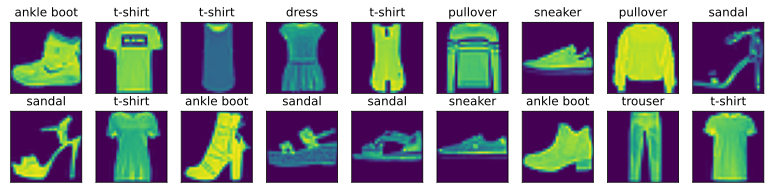

In [7]:
# 打印图片
X, y = next(iter(data.DataLoader(mnist_train, batch_size=18)))

# show_images(图片, 画布行数, 画布列数, 图片标题title);
show_images(X.reshape(18, 28, 28), 2, 9, titles=get_fashion_mnist_labels(y));


In [ ]:
# 打印图片
X,y = next(iter(data.DataLoader(mnist_train, batch_size=18)))

print(X.shape)
print(y.shape)

# show_images(图片, 画布行数, 画布列数, 图片标题title);
show_images(X.reshape(18,28,28), 2, 9, titles=get_fashion_mnist_labels(y));


In [ ]:
'''
# 定义load_data_fashion_mnist函数

def load_data_fashion_mnist(batch_size, resize=None):  #@save
    """下载Fashion-MNIST数据集，然后将其加载到内存中。"""
    trans = [transforms.ToTensor()]
    if resize:
        trans.insert(0, transforms.Resize(resize))
    trans = transforms.Compose(trans)
    mnist_train = torchvision.datasets.FashionMNIST(
        root="../data", train=True, transform=trans, download=True)
    mnist_test = torchvision.datasets.FashionMNIST(
        root="../data", train=False, transform=trans, download=True)
    return (data.DataLoader(mnist_train, batch_size, shuffle=True,
                            num_workers=get_dataloader_workers()),
            data.DataLoader(mnist_test, batch_size, shuffle=False,
                            num_workers=get_dataloader_workers()))


train_iter, test_iter = load_data_fashion_mnist(32, resize=64)
for X, y in train_iter:
    print(X.shape, X.dtype, y.shape, y.dtype)
    break
    
'''

## 简单实现

In [8]:
import torch
from torch import nn
from d2l import torch as d2l


#batch_size = 256
#train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)

In [9]:
# 构造网络

# PyTorch不会隐式地调整输入的形状。因此，
# 我们在线性层前定义了展平层（flatten），来调整网络输入的形状
net = nn.Sequential(nn.Flatten(), 
                    nn.Linear(784, 10))

def init_weights(m):
    if type(m) == nn.Linear:
        nn.init.normal_(m.weight, std=0.01)

net.apply(init_weights);


In [10]:
loss = nn.CrossEntropyLoss()

In [11]:
trainer = torch.optim.SGD(net.parameters(), lr=0.1)

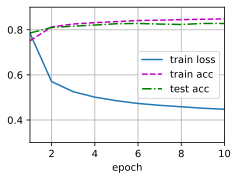

In [12]:
num_epochs = 10
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, trainer)